In [1]:
import sys
sys.path.append('../../')

In [2]:
import dvalib.crnn.utils as utils 
import dvalib.crnn.dataset as dataset
import torch
from torch.autograd import Variable
from PIL import Image
import dvalib.crnn.models.crnn as crnn
import glob
from IPython.core import display


model_path = '/root/DVA/dvalib/crnn/data/crnn.pth'
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'
model = crnn.CRNN(32, 1, 37, 256, 1)
print('loading pretrained model from %s' % model_path)
model.load_state_dict(torch.load(model_path))
converter = utils.strLabelConverter(alphabet)
transformer = dataset.resizeNormalize((100, 32))

loading pretrained model from /root/DVA/dvalib/crnn/data/crnn.pth


s----a-t----------t----s-- => satts               


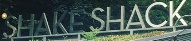

ss-h-a--k-e-ssh--aa-c--k-- => shakeshack          


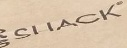

s--s---n----a---c---k----- => ssnack              


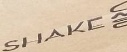

s----p----a---k---e----s-- => spakes              


e--x--e-r--e--g--a--t--e-- => exeregate           


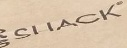

s--s---n----a---c---k----- => ssnack              


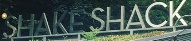

ss-h-a--k-e-ssh--aa-c--k-- => shakeshack          


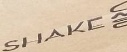

s----p----a---k---e----s-- => spakes              


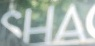

s-------h--------a-------- => sha                 


s----------r-------a------ => sra                 


p---la-sstiic--b-a--g--s-- => plasticbags         


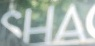

s-------h--------a-------- => sha                 


f--o--o-d---ss-c-ra--p--s- => foodscraps          


In [3]:
for img_path in glob.glob('boxes/*.jpg'):
    image = Image.open(img_path).convert('L')
    image = transformer(image)
    image = image.view(1, *image.size())
    image = Variable(image)
    model.eval()
    preds = model(image)
    _, preds = preds.max(2)
    preds = preds.squeeze(2)
    preds = preds.transpose(1, 0).contiguous().view(-1)
    preds_size = Variable(torch.IntTensor([preds.size(0)]))
    raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
    sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
    display.display(display.Image(img_path))
    print('%-20s => %-20s' % (raw_pred, sim_pred))